In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 61.7 MB/s 


In [ ]:
# ANN implementation 
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## divind the data set into depand / indepandent
X = data.iloc[:,3:-1]
y = data.iloc[:,-1]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
## feature engineering 
geography = pd.get_dummies(X['Geography'], drop_first = True)

In [ ]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [ ]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
## concatenate with dataframe
X = X.drop(['Geography','Gender'], axis = 1)

In [ ]:
X = pd.concat([X,geography, gender], axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 1)

For which all algorithm feature scaling is required ?

any thing which is distance based or where gradient descent is required scaling required - ANN,KNN, K-means LR, LOG R, 
but not in decision tree, XG boost, 

In [ ]:
### featre scaling (for ann Zscore would be good min ma or any other would be great fit with CNN)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test) # data linkage is the reason for aplying the feature scaling in test data

In [ ]:
X_train

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
X_test

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

In [ ]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [ ]:
### creating ANN model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# lets initialize the ann

def model():
  classifier = Sequential()
  ## adding input layer we have 11 input
  classifier.add(Dense(units = 11, activation = 'relu'))
  ## adding first hidden layer
  classifier.add(Dense(units=10, activation = 'relu'))
  #second hidden layer
  classifier.add(Dense(units=8, activation = 'relu'))
  classifier.add(Dropout(0.3))
  #third hidden layer
  classifier.add(Dense(units=3, activation = 'relu'))
  classifier.add(Dropout(0.3))
  ## adding output layer 
  classifier.add(Dense(units=1, activation = 'sigmoid'))
  return classifier


In [ ]:
classifier = model()

In [ ]:
classifier.compile(optimizer = 'adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# putting early stopper it make sure if the accuracy is not increasing then just stop the train
import tensorflow as tf
early_stop  = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 1000, callbacks=early_stop)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.6142 - accuracy: 0.7384 - val_loss: 0.5021 - val_accuracy: 0.8023
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5132 - accuracy: 0.7946 - val_loss: 0.4547 - val_accuracy: 0.8061
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4855 - accuracy: 0.8024 - val_loss: 0.4367 - val_accuracy: 0.8152
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4662 - accuracy: 0.8100 - val_loss: 0.4253 - val_accuracy: 0.8152
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4558 - accuracy: 0.8128 - val_loss: 0.4095 - val_accuracy: 0.8228
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4444 - accuracy: 0.8168 - val_loss: 0.4009 - val_accuracy: 0.8281
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4311 - accuracy: 0.8244 - val_loss: 0.3885 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

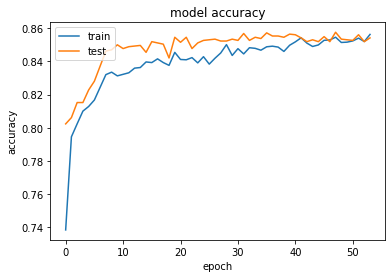

In [ ]:
# plot te accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

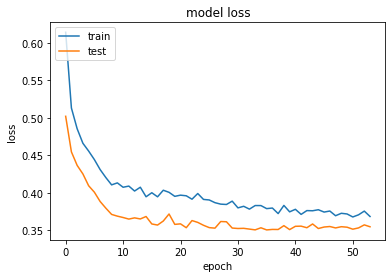

In [ ]:
# plot for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

In [ ]:
## makingt the confusion metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1526,   59],
       [ 229,  186]])

In [ ]:
# calculating the accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.856